# Research on the factors that determine the gross earnings of a movie.


## Step One: Read data file and import libraries

To build the model we will make use of some libraries:
(i) Pandas - To make accessing and transforming our data fast
(ii) Scipy - This is make the intrepretation of the output easier 
(iii) Matplotlib - this is an essential tool for visualing our data 

We load the data from the CSV file into a variable called myfile

In [ ]:
#reading relevant data from the csv file and storing it in a variable called myfile 
myfile='movie_metadata.csv'

In [ ]:
#standard imports for when working with pandas
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'


#read data from a csv file
df = pd.read_csv(myfile,index_col=None)
df = df.replace('..','nan')

#display the 'head' of the data
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Step Two : Clean the data 

Checklist for cleaning the data:
(i) Transform all values that we will be using into float object
(ii) Double check that the column names are correct to avoid errors.
(iii) Earlier I used the nan attribute to replace all missing values into 'nan'

In [ ]:
def make_float_array(anylist):
    newlist=[]
    for item in anylist:
        try:
            #turn the item into a float and append it to the list
            newlist.append(float(item))
        except:
            #what to do if anything in the try block causes a runtime error
            #you could print out a warning message here or do nothing
            
            pass
    #convert list to numpy array and return
    #you could return the list, most numpy functions will work on lists of floats
    #but each function call would result in numpy implicitly converting list to array
    #which would result in slower performance
    return np.array(newlist)  

In [ ]:
gross=make_float_array(df['gross'])
num_user_for_reviews=make_float_array(df['num_user_for_reviews'])
budget=make_float_array(df['budget'])
director_facebook_likes=make_float_array(df['director_facebook_likes'])
imdb_score=make_float_array(df['imdb_score'])
movie_facebook_likes=make_float_array(df['movie_facebook_likes'])




df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Step 3: Exploratory Data Analysis

For our Exploratory Data Analysis we will focus on finding the type of relationship between two variables with one being the 
independent variable while the other is the dependent variable, in this case the "gross". Typically we will be checking for linearity between the two variables in order to understand whether increasing/decreasing one will lead to an increase/decrease in the other.

Correlation of the two variables is computed to help us understand the type of relationship as well as how strong it is.

Testing linearity for budget (independent variable) and gross (dependent variable)

In [ ]:
budget_relation = df[['budget','gross']]

In [ ]:
budget_relation.cov()

,budget,gross
budget,4.248335e+16,1.586166e+15
gross,1.586166e+15,4.685812e+15


In [ ]:
country_relation.corr()

,budget,gross
budget,1.000000,0.102179
gross,0.102179,1.000000


Scatterplot for budget vs gross

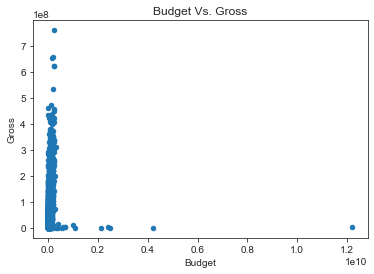

In [ ]:
df.plot.scatter(x='budget', y ='gross')
# make sure it's formatted.

plt.title("Budget Vs. Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")


plt.show()


The scatterplot Budget vs Gross shows that while the correlation is positive it is a very weak positive correlation as seen by the correlation coefficent of just 0.102. This leads us to understand that increasing the budget of the movie does not lead to an increase in the gross.

Testing linearity for num_user_for_reviews (independent variable) and gross (dependent variable)

In [ ]:
review_relation = df[['num_user_for_reviews','gross']]

In [ ]:
review_relation.cov()

,num_user_for_reviews,gross
num_user_for_reviews,1.428711e+05,1.531271e+10
gross,1.531271e+10,4.685812e+15


In [ ]:
review_relation.corr()

,num_user_for_reviews,gross
num_user_for_reviews,1.000000,0.559958
gross,0.559958,1.000000


Scatterplot for Number of reviews vs gross

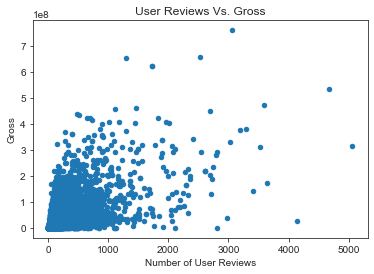

In [ ]:
df.plot.scatter(x='num_user_for_reviews', y ='gross')
# make sure it's formatted.
plt.title("User Reviews Vs. Gross")
plt.xlabel("Number of User Reviews")
plt.ylabel("Gross")


plt.show()

The scatterplot Number of reviews vs Gross shows that the correlation is positive, it also is a strong positive 
correlation as seen by the correlation coefficent of just 0.56. 
This leads us to understand that an increase in the number of reviews will lead to an increase in the gross.

Testing linearity for  facebook likes of the movie director (independent variable) and gross (dependent variable)

In [ ]:
director_relation = df[['director_facebook_likes','gross']]

In [ ]:
director_relation.cov()

,director_facebook_likes,gross
director_facebook_likes,7.914818e+06,2.923878e+10
gross,2.923878e+10,4.685812e+15


In [ ]:
director_relation.corr()

,director_facebook_likes,gross
director_facebook_likes,1.000000,0.144945
gross,0.144945,1.000000


Scatterplot for director facebook likes vs gross

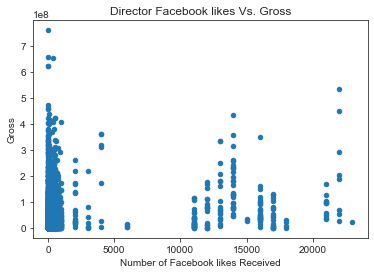

In [ ]:
df.plot.scatter(x='director_facebook_likes', y ='gross')
# make sure it's formatted.
plt.title("Director Facebook likes Vs. Gross")
plt.xlabel("Number of Facebook likes Received")
plt.ylabel("Gross")


plt.show()

The scatterplot Number of facebook likes vs Gross shows that while the correlation is positive, it is also very weak positive correlation as seen by the correlation coefficent of just 0.145. 
This leads us to understand that choosing a popular movie director for a movie will not lead to an increase in the gross.

Testing linearity for rating (independent variable) and gross (dependent variable)

In [ ]:
score_relation = df[['imdb_score','gross']]

In [ ]:
score_relation.cov()

,imdb_score,gross
imdb_score,1.265886e+00,1.426249e+07
gross,1.426249e+07,4.685812e+15


In [ ]:
score_relation.corr()

,imdb_score,gross
imdb_score,1.000000,0.198021
gross,0.198021,1.000000


Scatterplot for IMDB score vs gross

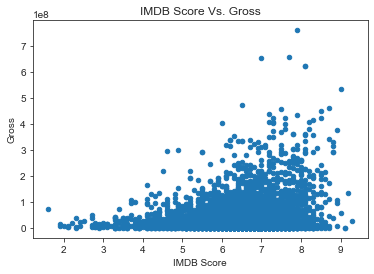

In [ ]:
df.plot.scatter(x='imdb_score', y ='gross')
# make sure it's formatted.
plt.title("IMDB Score Vs. Gross")
plt.xlabel("IMDB Score")
plt.ylabel("Gross")


plt.show()

The scatterplot IMDB Score vs Gross shows that the correlation is positive, it is a weak positive correlation at 0.198. 
This leads us to understand that a good IMDB rating will likely not increase gross.

Testing linearity for popularity (independent variable) and gross (dependent variable)

In [ ]:
facebook_relation = df[['movie_facebook_likes','gross']]

In [ ]:
facebook_relation.cov()

,movie_facebook_likes,gross
movie_facebook_likes,3.732796e+08,5.380181e+11
gross,5.380181e+11,4.685812e+15


In [ ]:
facebook_relation.corr()

,movie_facebook_likes,gross
movie_facebook_likes,1.000000,0.378082
gross,0.378082,1.000000


Scatterplot for Movie facebook likes vs gross

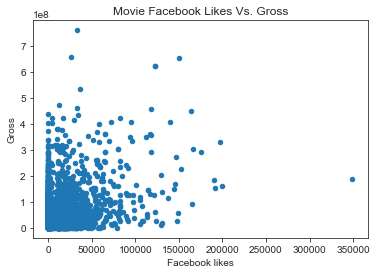

In [ ]:
df.plot.scatter(x='movie_facebook_likes', y ='gross')
# make sure it's formatted.
plt.title("Movie Facebook Likes Vs. Gross")
plt.xlabel("Facebook likes")
plt.ylabel("Gross")


plt.show()

The scatterplot facebook likes vs Gross shows that the correlation is weak. The number of facebook likes do not increase gross  
This leads us to understand that a having more facebook likes rating will increase gross.

## Step 4 : Build the model

In this section we perform multiple linear regression 
Our explanatory variables are: budget, num_user_for_reviews, director_facebook_likes, imdb_score, movie_facebook_likes
The dependent variable is: gross


In [ ]:

import statsmodels.api as sm

X = df[['budget','num_user_for_reviews','director_facebook_likes','imdb_score','movie_facebook_likes',]]# here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['gross']

X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X, missing='drop').fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     402.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:55:49   Log-Likelihood:                -74985.
No. Observations:                3891   AIC:                         1.500e+05
Df Residuals:                    3885   BIC:                         1.500e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Hypothesis Testing:

(i) Null Hypothesis: There is no relationship between the exploratory variables and the explanatory variable.
(ii) Alternative Hypothesis: There is a relationship between the exploratory variables and the explanatory variable.

If we reject the null, we are saying there is a relationship, and the coefficients do not equal 0.
If we fail to reject the null, we are saying there is no relationship, and the coefficients do equal 0

From our regression table we will remove the coefficients that have p-values greater than 0.05 as these are irrelevant to us since they are outside of our confidence intervals. 

In [ ]:
import statsmodels.api as sm

X = df[['budget','num_user_for_reviews','movie_facebook_likes',]]# here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['gross']

X = sm.add_constant(X) # adding a constant


model = sm.OLS(Y, X, missing='drop').fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     670.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:24:02   Log-Likelihood:                -74985.
No. Observations:                3891   AIC:                         1.500e+05
Df Residuals:                    3887   BIC:                         1.500e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.784e+07 

The explanatory variables that we use after removing the irrelevant variables have a p-value less than 0.05 which means they are all relevant to our model.

## Summary of findings:

To summarise, we have been able to establish some linear correlations between a number of independent variables and our dependent variable which is gross.

We found that there are some independent variables that have a strong positive correlation with the gross meaning that by increasing them, the gross of the movie is also likely to increase. The most significant variable was found to be the num_user_for_review, meaning that if the movie gets more user reviews it will likely increase in gross income earmned. The least significant factor was found to be the budget. The relationship shows that there is no linear relationship between budget and the gross meaning that an increase in budget will likely not lead to a increase in gross. Director reviews and IMDB rating also showed a very weak relationship, while number of facebook likes showed a relatively sginificant positive correlation with gross.

Using the model we found two irrelevant variables, namely director_facebook_likes and IMDB score which we removed.

## Conclusion:

In conclusion, we found that budget does not impact on gross meaning that increasing the budget will unlikely lead to an increase in gross. Therefore, we recommend that the budget be kept low to give the movie a good to have a much higher gross than the budget. However, a significant factor is the number of user review so we recommend spending more time on marketing the movie to users/watchers or soliciting for more reviews from users as this will likely have a strong positive relationship to the gross.

The factors that are significant in predicting gross are Budget, user reviews, and number of facebook likes as seen in our final model. Using these variables it is possible to predict gross of the movie.